# Blending with Laplacian Pyramid


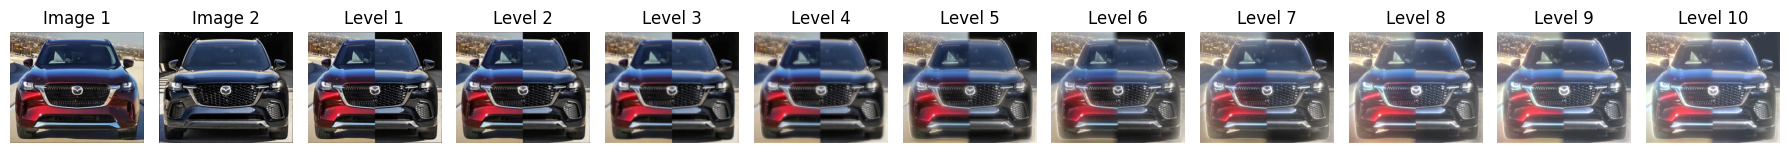

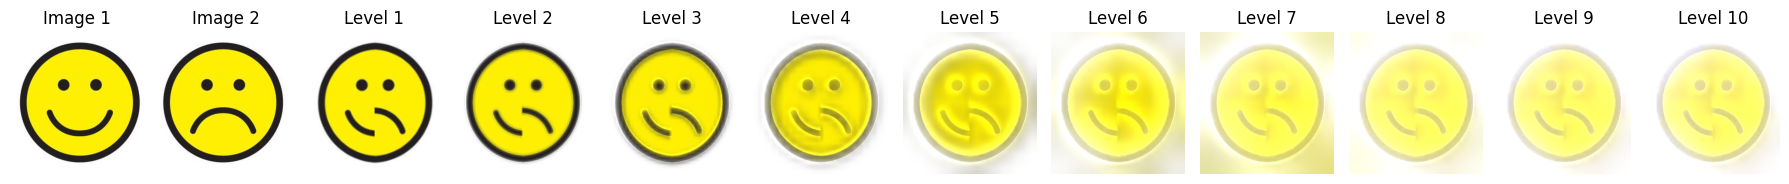

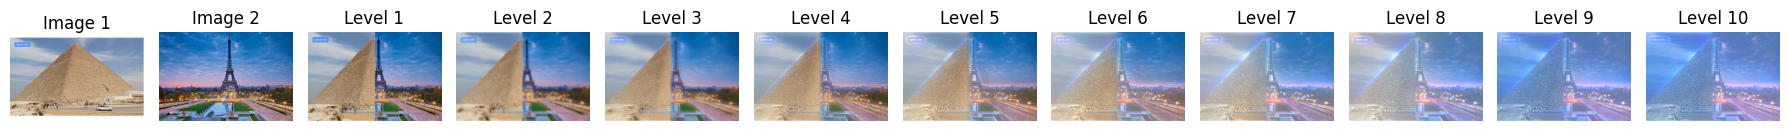

In [73]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to generate Laplacian pyramid of an image
def generate_laplacian_pyramid(image, levels=6):
    # Initialize a list to store the pyramid levels
    pyramid = [image]

    # Generate Gaussian pyramid
    for _ in range(levels):
        image = cv.pyrDown(image)
        pyramid.append(image)

    # Generate Laplacian pyramid by subtracting adjacent Gaussian pyramid levels
    laplacian_pyramid = [pyramid[-1]]
    for i in range(levels-1, 0, -1):
        expanded = cv.pyrUp(pyramid[i])
        laplacian = cv.subtract(pyramid[i - 1], cv.resize(expanded, (pyramid[i - 1].shape[1], pyramid[i - 1].shape[0])))
        laplacian_pyramid.append(laplacian)

    return laplacian_pyramid

# Function to reconstruct the image from its Laplacian pyramid
def reconstruct_image(pyramid):
    reconstructed_image = pyramid[0]
    for i in range(1, len(pyramid)):
        reconstructed_image = cv.add(pyramid[i], cv.resize(reconstructed_image, (pyramid[i].shape[1], pyramid[i].shape[0])))
    return reconstructed_image

# Function to blend two images using Laplacian pyramid blending
def blend_images(image1, image2, levels=6):
    # Resize image1 to match the dimensions of image2
    image1 = cv.resize(image1, (image2.shape[1], image2.shape[0]))

    # Generate Laplacian pyramid for image1
    pyramid1 = generate_laplacian_pyramid(image1, levels)

    # Generate Laplacian pyramid for image2
    pyramid2 = generate_laplacian_pyramid(image2, levels)

    # Combine the Laplacian pyramids
    blended_pyramid = []
    for la, lb in zip(pyramid1, pyramid2):
        rows, cols, _ = la.shape
        blended = np.hstack((la[:, :cols // 2], lb[:, cols // 2:]))
        blended_pyramid.append(blended)

    # Reconstruct the blended image
    blended_image = reconstruct_image(blended_pyramid)
    return blended_image

# Define the combinations of image files
combinations = [
    {'file_A': '/content/Car1.PNG', 'file_B': '/content/Car2.png'},
    {'file_A': '/content/Smile Face.jpg', 'file_B': '/content/Sad Face.jpg'},
    {'file_A': '/content/pyramids.PNG', 'file_B': '/content/eiffel tower.jpeg'}
]

# Define the levels for blending
levels = 10

for idx, combination in enumerate(combinations):
    file_A = combination['file_A']
    file_B = combination['file_B']

    assert os.path.exists(file_A), f"{file_A} does not exist"
    assert os.path.exists(file_B), f"{file_B} does not exist"

    # Load the images
    A = cv.imread(file_A)
    B = cv.imread(file_B)

    # Generate the blended images at different levels
    blended_images = []
    for level in range(1, levels+1):
        blended_image = blend_images(A, B, level)
        blended_images.append(blended_image)

    # Display the images
    num_images = levels + 2  # Number of images to display: original images + blended images at different levels

    plt.figure(figsize=(18,6))

    # Original images
    plt.subplot(1, num_images, 1)
    plt.imshow(cv.cvtColor(A, cv.COLOR_BGR2RGB))
    plt.title('Image 1')
    plt.axis('off')

    plt.subplot(1, num_images, 2)
    plt.imshow(cv.cvtColor(B, cv.COLOR_BGR2RGB))
    plt.title('Image 2')
    plt.axis('off')

    # Blended images at different levels
    for i, blended_image in enumerate(blended_images):
        plt.subplot(1, num_images, i+3)
        plt.imshow(cv.cvtColor(blended_image, cv.COLOR_BGR2RGB))
        plt.title(f'Level {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
